# Data Cleaning and Preparation: Female Genital Mutilation (FGM) and Neonatal Health Outcomes in Somalia


### Research Context

This notebook documents the data cleaning and preparation process for analyzing the impact of Female Genital Mutilation (FGM) on neonatal health outcomes among Somali women. FGM remains a significant public health concern in Somalia, and understanding how the severity of the procedure affects neonatal health is critical for informing maternal and child health interventions.

### Research Question

How does the severity at which FGM (Female Genital Mutilation) is performed influence neonatal health outcomes?
### Dataset Information
Source: Somalia Demographic and Health Survey (SHDS) 2020  
Population: Ever-married women aged 12-49 years  
Record Type: Individual Recode (IR) - One record per eligible woman  
Original Format: SPSS (.sav) → Converted to CSV  
### Key Data Characteristics

Survey Design: Multi-stage cluster sampling with stratification  
Weighting: Population-representative weights included (V005)  
Geographic Coverage: National coverage across Somali regions  
Temporal Coverage: Births and health events in the 5 years preceding the survey.  

### The dataset contains multiple record types for each woman:

Single variables: Demographic characteristics (age, education, wealth)
Multiple variables: Birth history, child health, contraceptive knowledge

These variables allow us to examine:

 * Neonatal health outcomes (child survival and age at death)
 * Birth and delivery characteristics (e.g., C-section)
 * FGM practices and severity (type, extent, age at circumcision, and performer)
This setup enables an analysis of the relationship between FGM severity and neonatal outcomes while accounting for relevant maternal and birth characteristics.
##### Suffix notation: $01, $02, $03, etc. represent multiple events/children
Example: M70$01 = postnatal care for 1st birth, M70$02 = 2nd birth

In [121]:
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.max_columns = False  # 2. Set display options for easier inspection

In [ ]:
case_path = "converted_file.csv"
ever_married_df = pd.read_csv(filepath_or_buffer=case_path, low_memory=False)

In [124]:
ever_married_df.head()  # Display the first few rows of the DataFrame

,id2,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,VHHID,ACTUAL_EA_CODE,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V027,V028,V030,V040,V045A,V045B,V045C,V101,V102,V106A,...,CALENDAR_STRING$59,CALENDAR_STRING$60,CALENDAR_STRING$61,CALENDAR_STRING$62,CALENDAR_STRING$63,CALENDAR_STRING$64,CALENDAR_STRING$65,CALENDAR_STRING$66,CALENDAR_STRING$67,CALENDAR_STRING$68,CALENDAR_STRING$69,CALENDAR_STRING$70,CALENDAR_STRING$71,CALENDAR_STRING$72,CALENDAR_STRING$73,CALENDAR_STRING$74,CALENDAR_STRING$75,CALENDAR_STRING$76,CALENDAR_STRING$77,CALENDAR_STRING$78,CALENDAR_STRING$79,CALENDAR_STRING$80,VCOL,VCAL,STRU_CD,RG_CODE,DM_NAME,DM_CODE,RES,NORMWT_MS7,V613a,V626Aw,V313w,V312_1,V226_1,V481C,W4049,V213W,v201w,C4049
0,256.0,216.0,SO7,8.0,6.0,NaN,NaN,0.536153,8.0,2018.0,1424.0,43116.0,1.0,1969.0,829.0,49.0,2.0,1.101001e+11,NaN,NaN,1.0,15.0,1357.0,13.0,66.0,NaN,NaN,NaN,NaN,NaN,1.0,118.0,NaN,NaN,2.0,2.0,2.0,11.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0000000000000000000000000000000000000000000000...,312.0,11.0,Awdal,31.0,2.0,0.557683,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.09
1,245.0,403.0,SO7,8.0,54.0,3.0,NaN,0.536153,8.0,2018.0,1424.0,43117.0,1.0,2000.0,1201.0,18.0,4.0,1.101001e+11,1.0,NaN,1.0,16.0,NaN,13.0,66.0,NaN,NaN,NaN,NaN,NaN,2.0,118.0,8434.0,NaN,NaN,1.0,2.0,11.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,11.0,Awdal,31.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09
2,257.0,502.0,SO7,8.0,65.0,2.0,NaN,0.536153,8.0,2018.0,1424.0,43117.0,4.0,1980.0,964.0,38.0,5.0,1.101001e+11,5.0,NaN,1.0,16.0,1357.0,13.0,66.0,NaN,NaN,NaN,NaN,NaN,1.0,118.0,NaN,NaN,2.0,2.0,2.0,11.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,00000000000000000000000000000000000000TPP00000...,312.0,11.0,Awdal,31.0,2.0,0.557683,5.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,5.0,0.09
3,258.0,645.0,SO7,8.0,40.0,NaN,NaN,0.536153,8.0,2018.0,1424.0,43116.0,5.0,1983.0,1001.0,35.0,6.0,1.101001e+11,5.0,NaN,1.0,15.0,1357.0,13.0,66.0,NaN,NaN,NaN,NaN,NaN,1.0,367.0,NaN,NaN,2.0,2.0,2.0,11.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0000000000000000000000000000000000000000000000...,312.0,11.0,Awdal,31.0,2.0,0.557683,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.09
4,259.0,705.0,SO7,8.0,43.0,5.0,NaN,0.536153,8.0,2018.0,1424.0,43118.0,6.0,1993.0,1122.0,25.0,7.0,1.101001e+11,3.0,NaN,1.0,17.0,1357.0,13.0,66.0,NaN,NaN,NaN,NaN,NaN,1.0,367.0,NaN,NaN,2.0,2.0,2.0,11.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0000000000000000000000000000000000000000000000...,312.0,11.0,Awdal,31.0,2.0,0.557683,4.0,9.0,NaN,0.0,6.0,NaN,NaN,NaN,NaN,0.09


In [125]:
ever_married_df.columns  # List all columns in the DataFrame

Index(['id2', 'CASEID', 'V000', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007',
       ...
       'V613a', 'V626Aw', 'V313w', 'V312_1', 'V226_1', 'V481C', 'W4049',
       'V213W', 'v201w', 'C4049'],
      dtype='object', length=5451)

we have 5451 question and answer columns some of them for the same question with numbered labels

( The numbering system ($01, $02, $03, etc.) indicates that these are repeated measurements or multiple records for the same variable. This happens because the DHS (Demographic and Health Survey) collects data on multiple events or items for each woman. Here's why:
Common Reasons for Multiple Entries:
1. Birth History Variables (B-series, M-series, H-series)

Each woman can have multiple births/pregnancies
$01 = data for 1st birth, $02 = 2nd birth, $03 = 3rd birth, etc.
Example:

B4$01 = Sex of 1st child
B4$02 = Sex of 2nd child
B4$03 = Sex of 3rd child



2. Child Health Variables (H-series)

Each child has their own health record
H1$01 = Health card status for 1st child
H1$02 = Health card status for 2nd child

3. Contraceptive Knowledge (V304-series)

Multiple contraceptive methods are asked about
V304$01 = Knowledge of method 1 (e.g., pill)
V304$02 = Knowledge of method 2 (e.g., IUD)

4. Sibling Mortality (MM-series)

Data on each sibling who died
MM1$01 = Sex of 1st deceased sibling
MM1$02 = Sex of 2nd deceased sibling

1. Circumcision (G-series)

Each daughter has separate records
G109A$01 = 1st daughter circumcised (yes/no)
G109A$02 = 2nd daughter circumcised (yes/no))

and there are 13 Section for Ever Married Woman's questionnaire
Section 1: Respondent’s Background  
Section 2: Reproduction  
Section 3: Birth Spacing  
Section 4: Pregnancy and Postnatal Care  
Section 5: Child Immunization  
Section 6: Child Health and Nutrition  
Section 7: Fertility Preferences   
Section 8: Husband’s Background and Woman’s Work  
Section 9: HIV/AIDS Section  
section10: Other Health Issues  
Section 11: Female Circumcision  
Section 12: Maternal Deaths  
Section 13: Female Circumcision  


In [126]:
ever_married_df.dtypes  # Display data types of each column

id2       float64
CASEID    float64
V000       object
V001      float64
V002      float64
           ...   
V481C     float64
W4049     float64
V213W     float64
v201w     float64
C4049     float64
Length: 5451, dtype: object

* float64:
Used for columns that contain decimal values, numeric timestamps, or intervals. It also supports null values. For example, DETENTION_DATE is set as float64 because, while it appears empty in the sample, it may contain numeric time-related data in the full dataset.


* category:
Applied to string columns with repeated values (e.g., dIFFERENT LABELS) for efficient storage and faster processing.

* string:
Used for LABEL, which uses a partial date format (e.g., MM/YYYY) and may contain nulls. The new string type is preferred over object for consistent handling of text.


* object:
A general-purpose type used by default for mixed or untyped data, especially strings. If a column contains text, Pandas will assign it the object type unless you explicitly convert it to string or category. It can also hold other Python objects like lists or dates (before parsing). Use with caution when performance or memory optimization is important.

In [127]:
for col in ever_married_df.columns:
    print(col)

id2
CASEID
V000
V001
V002
V003
V004
V005
V006
V007
V008
V008A
V009
V010
V011
V012
VHHID
ACTUAL_EA_CODE
V013
V014
V015
V016
V017
V018
V019
V019A
V020
V021
V022
V023
V027
V028
V030
V040
V045A
V045B
V045C
V101
V102
V106A
V106
V107
V133
V149
V155
V157
V158
V159
V169A
V169B
V170
V171
V171A
V171B
V190
V191
V201
V202
V203
V204
V205
V206
V207
V208
V209
V210
V211
V212
V213
V214
V215
V217
V218
V219
V222
V225
V226
V229
V230
V231
V238
V240
V241
V242
V302
V312
V313
V323
V326
V364
V384A
V384B
V384C
V384D
V384E
V384F
V393A
V394
V395
V3A02
V3A03
V3A04
V3A05
V3A06
V3A07
V3A08A
V3A08B
V3A08C
V3A08D
V3A08E
V3A08F
V3A08G
V3A08H
V3A08I
V3A08J
V3A08K
V3A08L
V3A08M
V3A08N
V3A08P
V3A08Q
V3A08R
V3A08S
V3A08T
V3A08U
V3A08X
V3A08Z
V401
V404
V405
V406
V409
V410
V411
V411A
V411B
V412A
V412C
V413
V414E
V414F
V414G
V414H
V414I
V414J
V414K
V414L
V414M
V414N
V414O
V414P
V414S
V414V
V416
V417
V463A
V463B
V463C
V463D
V463E
V463F
V463G
V463H
V463I
V463X
V463Z
V465
V467B
V467C
V467D
V467F
V469E
V469F
V469G
V469X
V481A
V48

### Selected Features(Questions) for EDA


B5-child alive or dead at time interview  
B6- age at death(if start with1 days, 2 months, 3 years)  
B7- age at death in completed months(months)  
M17- delivery by caesarean section(1:yes, 2:no)  
G102 - If Respondent circumcised.(1:yes, 2:no)  
G102A -type of circumcision respondent underwent(1:Sunn, 2:Intermediate, 3:Pharaonic, 4:Don't Know 5:Other)  
G103- flesh removed from genital area(1:yes)  
G104- genital area just nicked without removing any flesh(1:yes)  
G105- genital area sewn closed(1:yes)  
G106- age at circumcision( age in years, 95:baby, 98:Don't Know)  
G107- Who performed circumcision?(11:Trad circumcizer, 12:Trad Birth attendant, 13:Other Trad, 21:Doctor,  
 22:Clinical officer,23:Nurse/midwife,24:Other Healt Professional,26:Don't Know,)  
V218- number of living children (number)  
 

In [ ]:
selected_columns = [
    "id2",
    "CASEID",
    "B5$01",
    "B5$02",
    "B5$03",
    "B5$04",
    "B5$05",
    "B5$06",
    "B5$07",
    "B5$08",
    "B5$09",
    "B5$10",
    "B5$11",
    "B5$12",
    "B5$13",
    "B5$14",
    "B5$15",
    "B5$16",
    "B5$17",
    "B5$18",
    "B5$19",
    "B5$20",
    "B6$01",
    "B6$02",
    "B6$03",
    "B6$04",
    "B6$05",
    "B6$06",
    "B6$07",
    "B6$08",
    "B6$09",
    "B6$10",
    "B6$11",
    "B6$12",
    "B6$13",
    "B6$14",
    "B6$15",
    "B6$16",
    "B6$17",
    "B6$18",
    "B6$19",
    "B6$20",
    "B7$01",
    "B7$02",
    "B7$03",
    "B7$04",
    "B7$05",
    "B7$06",
    "B7$07",
    "B7$08",
    "B7$09",
    "B7$10",
    "B7$11",
    "B7$12",
    "B7$13",
    "B7$14",
    "B7$15",
    "B7$16",
    "B7$17",
    "B7$18",
    "B7$19",
    "B7$20",
    "M17$01",
    "M17$02",
    "M17$03",
    "M17$04",
    "M17$05",
    "M17$06",
    "M17$07",
    "M17$08",
    "M17$09",
    "M17$10",
    "M17$11",
    "M17$12",
    "M17$13",
    "M17$14",
    "M17$15",
    "M17$16",
    "M17$17",
    "M17$18",
    "M17$19",
    "M17$20",
    "G102",
    "G102A",
    "G103",
    "G104",
    "G105",
    "G106",
    "G107",
    "V218",
]
ever_married_df = ever_married_df[selected_columns]

In [129]:
ever_married_df.head()  # Display the first few rows of the DataFrame

,id2,CASEID,B5$01,B5$02,B5$03,B5$04,B5$05,B5$06,B5$07,B5$08,B5$09,B5$10,B5$11,B5$12,B5$13,B5$14,B5$15,B5$16,B5$17,B5$18,B5$19,B5$20,B6$01,B6$02,B6$03,B6$04,B6$05,B6$06,B6$07,B6$08,B6$09,B6$10,B6$11,B6$12,B6$13,B6$14,B6$15,B6$16,B6$17,B6$18,...,B7$09,B7$10,B7$11,B7$12,B7$13,B7$14,B7$15,B7$16,B7$17,B7$18,B7$19,B7$20,M17$01,M17$02,M17$03,M17$04,M17$05,M17$06,M17$07,M17$08,M17$09,M17$10,M17$11,M17$12,M17$13,M17$14,M17$15,M17$16,M17$17,M17$18,M17$19,M17$20,G102,G102A,G103,G104,G105,G106,G107,V218
0,256.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,NaN,9.0,11.0,NaN
1,245.0,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,6.0,11.0,NaN
2,257.0,502.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,6.0,11.0,NaN
3,258.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,8.0,11.0,NaN
4,259.0,705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,11.0,11.0,NaN


In [130]:
ever_married_df.columns  # List all columns in the DataFrame

Index(['id2', 'CASEID', 'B5$01', 'B5$02', 'B5$03', 'B5$04', 'B5$05', 'B5$06',
       'B5$07', 'B5$08', 'B5$09', 'B5$10', 'B5$11', 'B5$12', 'B5$13', 'B5$14',
       'B5$15', 'B5$16', 'B5$17', 'B5$18', 'B5$19', 'B5$20', 'B6$01', 'B6$02',
       'B6$03', 'B6$04', 'B6$05', 'B6$06', 'B6$07', 'B6$08', 'B6$09', 'B6$10',
       'B6$11', 'B6$12', 'B6$13', 'B6$14', 'B6$15', 'B6$16', 'B6$17', 'B6$18',
       'B6$19', 'B6$20', 'B7$01', 'B7$02', 'B7$03', 'B7$04', 'B7$05', 'B7$06',
       'B7$07', 'B7$08', 'B7$09', 'B7$10', 'B7$11', 'B7$12', 'B7$13', 'B7$14',
       'B7$15', 'B7$16', 'B7$17', 'B7$18', 'B7$19', 'B7$20', 'M17$01',
       'M17$02', 'M17$03', 'M17$04', 'M17$05', 'M17$06', 'M17$07', 'M17$08',
       'M17$09', 'M17$10', 'M17$11', 'M17$12', 'M17$13', 'M17$14', 'M17$15',
       'M17$16', 'M17$17', 'M17$18', 'M17$19', 'M17$20', 'G102', 'G102A',
       'G103', 'G104', 'G105', 'G106', 'G107', 'V218'],
      dtype='object')

### Missing Values Summary

Counts and percentages of missing values were calculated for each column in the `ever_married_df` dataframe to assess data completeness.  
`.isna().sum()` computes the total number of missing entries, and the percentage is derived by dividing by the total number of rows.  
Columns are sorted by missing count to highlight those requiring attention during data cleaning.

In [ ]:
null_counts = ever_married_df.isna().sum()
percent_missing = (null_counts / len(ever_married_df)) * 100

missing_summary = pd.DataFrame(
    {
        "Not Missing": len(ever_married_df) - null_counts,
        "Missing Count": null_counts,
        "Missing %": percent_missing.round(2),
    }
).sort_values(by="Missing Count", ascending=False)

display(missing_summary)

,Not Missing,Missing Count,Missing %
B5$20,0,16486,100.00
B5$19,0,16486,100.00
M17$20,0,16486,100.00
M17$19,0,16486,100.00
M17$18,0,16486,100.00
...,...,...,...
G102A,14853,1633,9.91
G107,14853,1633,9.91
G102,14959,1527,9.26
CASEID,16486,0,0.00


In [132]:
ever_married_df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16486 entries, 0 to 16485
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id2     16486 non-null  float64
 1   CASEID  16486 non-null  float64
 2   B5$01   10671 non-null  float64
 3   B5$02   9489 non-null   float64
 4   B5$03   8017 non-null   float64
 5   B5$04   6416 non-null   float64
 6   B5$05   4940 non-null   float64
 7   B5$06   3592 non-null   float64
 8   B5$07   2454 non-null   float64
 9   B5$08   1563 non-null   float64
 10  B5$09   927 non-null    float64
 11  B5$10   505 non-null    float64
 12  B5$11   240 non-null    float64
 13  B5$12   120 non-null    float64
 14  B5$13   55 non-null     float64
 15  B5$14   22 non-null     float64
 16  B5$15   10 non-null     float64
 17  B5$16   4 non-null      float64
 18  B5$17   1 non-null      float64
 19  B5$18   1 non-null      float64
 20  B5$19   0 non-null      float64
 21  B5$20   0 non-null      float64
 22

## Cleaning unnecessary rows and columns

If all the data we are looking for is NaN or empty, we no longer need that row.

In [ ]:
# List of relevant columns
child_health_columns = [
    # B5: child alive or dead at time of interview
    "B5$01",
    "B5$02",
    "B5$03",
    "B5$04",
    "B5$05",
    "B5$06",
    "B5$07",
    "B5$08",
    "B5$09",
    "B5$10",
    "B5$11",
    "B5$12",
    "B5$13",
    "B5$14",
    "B5$15",
    "B5$16",
    "B5$17",
    "B5$18",
    "B5$19",
    "B5$20",
    # B6: age at death (1: days, 2: months, 3: years)
    "B6$01",
    "B6$02",
    "B6$03",
    "B6$04",
    "B6$05",
    "B6$06",
    "B6$07",
    "B6$08",
    "B6$09",
    "B6$10",
    "B6$11",
    "B6$12",
    "B6$13",
    "B6$14",
    "B6$15",
    "B6$16",
    "B6$17",
    "B6$18",
    "B6$19",
    "B6$20",
    # B7: age at death in completed months
    "B7$01",
    "B7$02",
    "B7$03",
    "B7$04",
    "B7$05",
    "B7$06",
    "B7$07",
    "B7$08",
    "B7$09",
    "B7$10",
    "B7$11",
    "B7$12",
    "B7$13",
    "B7$14",
    "B7$15",
    "B7$16",
    "B7$17",
    "B7$18",
    "B7$19",
    "B7$20",
    # M17: delivery by caesarean section (1: yes, 2: no)
    "M17$01",
    "M17$02",
    "M17$03",
    "M17$04",
    "M17$05",
    "M17$06",
    "M17$07",
    "M17$08",
    "M17$09",
    "M17$10",
    "M17$11",
    "M17$12",
    "M17$13",
    "M17$14",
    "M17$15",
    "M17$16",
    "M17$17",
    "M17$18",
    "M17$19",
    "M17$20",
    # FGM-related variables
    "G102",
    "G102A",
    "G103",
    "G104",
    "G105",
    "G106",
    "G107",
    # Number of living children
    "V218",
]

# Drop rows where all these columns are NaN
ever_married_df = ever_married_df.dropna(subset=child_health_columns, how="all")

In [ ]:
# replace empty strings with NaN for better handling of missing values
ever_married_df = ever_married_df.replace("", np.nan)
# Drop columns where all values are NaN
ever_married_df = ever_married_df.dropna(axis=1, how="all")
# Drop rows where all values are NaN
ever_married_df = ever_married_df.dropna(axis=0, how="all")

# Show the DataFrame shape after dropping
print(f"Number of rows after removing all-NaN rows: {len(ever_married_df)}")
print("Number of columns:", ever_married_df.shape[1])

Number of rows after removing all-NaN rows: 16010
Number of columns: 70


### Converting B5 Columns (Child Alive/Dead Status)

The variables B5$01 to B5$20 indicate whether each child is alive or dead at the time of the interview.
Original values are coded as:
- **1 = Alive**
- **2 = Dead**

In order to make the data easier to understand and to visualize, we convert these numeric codes into descriptive categories ("Alive" and "Dead"). This transformation will help during plotting and interpretation of results.

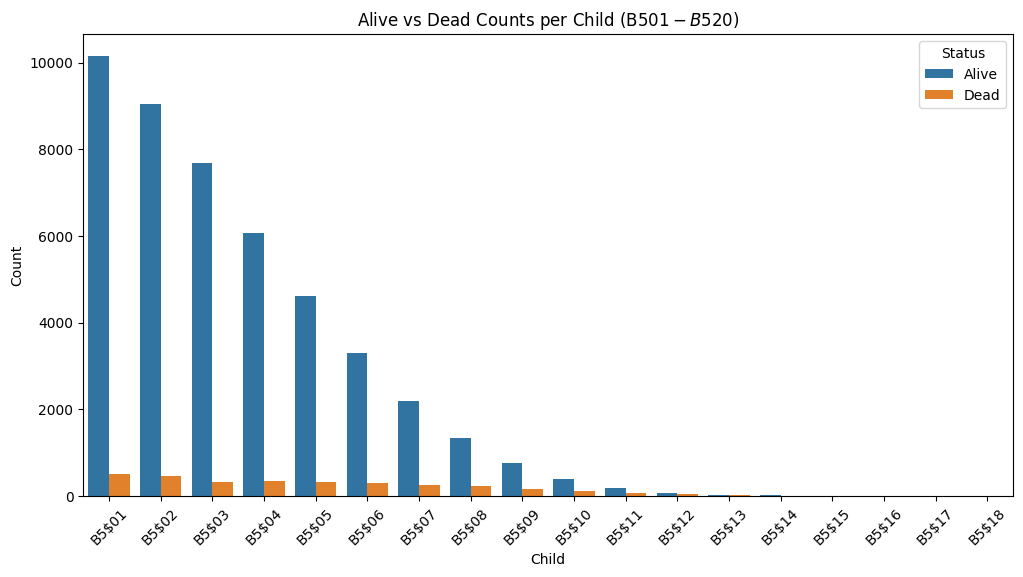

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# B5 columns
b5_cols = [col for col in ever_married_df.columns if col.startswith("B5$")]

# Create a temporary DataFrame for plotting (do not overwrite original)
b5_temp = (
    ever_married_df[b5_cols]
    .apply(pd.to_numeric, errors="coerce")
    .replace({1: "Alive", 2: "Dead"})
)

# Count Alive/Dead for each child
b5_counts = pd.DataFrame({col: b5_temp[col].value_counts() for col in b5_cols}).T

# Ensure both 'Alive' and 'Dead' columns exist
for status in ["Alive", "Dead"]:
    if status not in b5_counts.columns:
        b5_counts[status] = 0

# Reset index for plotting
b5_counts = b5_counts.reset_index().rename(columns={"index": "Child"})

# Melt for seaborn
b5_melted = b5_counts.melt(
    id_vars="Child", value_vars=["Alive", "Dead"], var_name="Status", value_name="Count"
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=b5_melted, x="Child", y="Count", hue="Status")
plt.title("Alive vs Dead Counts per Child (B5$01 - B5$20)")
plt.xlabel("Child")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.show()

### Converting B6 Columns (Age at Death per Child)

The variables B6$01 to B6$20 indicate the age at death for each child, where the first digit represents the unit:
- 1 = Days
- 2 = Months
- 3 = Years

Each column corresponds to a child (`$01` = first child, `$02` = second child, etc.).

We will:
1. Convert all values to numeric Days for consistency.
2. Optionally create readable categorical labels for plotting.
3. will use Numeric(float64) datatype and keep NaN values as NaN.
4. check how many missing values in total

C:\Users\isikm\AppData\Local\Temp\ipykernel_32472\3429073838.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  b6_months_df = b6_months_df.applymap(lambda x: x if (pd.notna(x) and x <= max_days) else np.nan)


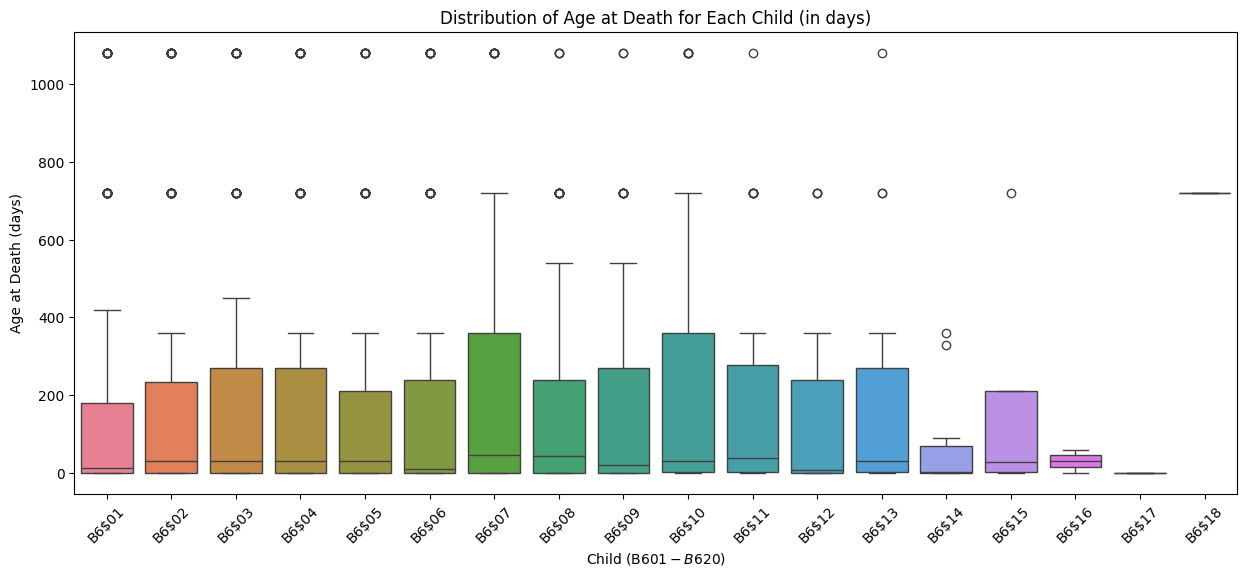

Missing values per column:
 B6$01    15557
B6$02    15640
B6$03    15743
B6$04    15732
B6$05    15753
B6$06    15762
B6$07    15788
B6$08    15832
B6$09    15879
B6$10    15916
B6$11    15954
B6$12    15977
B6$13    15987
B6$14    16000
B6$15    16005
B6$16    16008
B6$17    16009
B6$18    16009
dtype: int64

Total missing values in all B6 columns: 285551
Missing percentage per column (%):
 B6$01    97.170518
B6$02    97.688944
B6$03    98.332292
B6$04    98.263585
B6$05    98.394753
B6$06    98.450968
B6$07    98.613367
B6$08    98.888195
B6$09    99.181761
B6$10    99.412867
B6$11    99.650219
B6$12    99.793879
B6$13    99.856340
B6$14    99.937539
B6$15    99.968770
B6$16    99.987508
B6$17    99.993754
B6$18    99.993754
dtype: float64


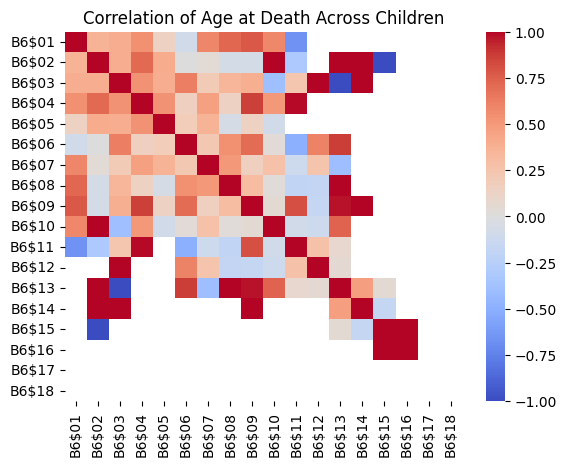

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------
# B6 Columns: Age at Death
# The variables B6$01 to B6$20 indicate the age at death for each child:
# - 1 = Days
# - 2 = Months
# - 3 = Years
# Each column corresponds to a child ($01 = first child, $02 = second child, etc.)
# We will convert all values to numeric months for consistency
# --------------------------------------------------

# Find all B6 columns
b6_cols = [col for col in ever_married_df.columns if col.startswith("B6$")]

# Convert to numeric first
ever_married_df[b6_cols] = ever_married_df[b6_cols].apply(
    pd.to_numeric, errors="coerce"
)


# Function to convert age to months and create a descriptive label
def age_to_days_and_label(code):
    # Handle NaN or empty values
    if code is None or (isinstance(code, float) and np.isnan(code)):
        return np.nan, np.nan
    try:
        code_int = int(float(code))  # handle floats that represent integers
        code_str = str(code_int)
        if len(code_str) < 2:  # not enough digits
            return np.nan, np.nan
        unit = int(code_str[0])
        value = int(code_str[1:])
        if unit == 1:  # days
            days = value
            label = f"{value} days(s)"
        elif unit == 2:  # months
            days = value * 30
            label = f"{value} month(s)"
        elif unit == 3:  # years
            days = value * 12 * 30
            label = f"{value} year(s)"
        else:
            return np.nan, np.nan
        return days, label
    except (ValueError, TypeError):
        return np.nan, np.nan


# Apply conversion to all B6 columns
days_dict = {}
label_dict = {}

for col in b6_cols:
    days_list = []
    label_list = []
    for val in ever_married_df[col]:
        days, label = age_to_days_and_label(val)
        days_list.append(days)
        label_list.append(label)
    days_dict[col] = days_list
    label_dict[col] = label_list

b6_months_df = pd.DataFrame(days_dict)
b6_labels_df = pd.DataFrame(label_dict)
# Remove outliers greater than 3 years (3*365 = 1095 days)
max_days = 3 * 365
b6_months_df = b6_months_df.applymap(
    lambda x: x if (pd.notna(x) and x <= max_days) else np.nan
)

# Combined Boxplot for All Children
# --------------------------------------------------
plt.figure(figsize=(15, 6))
sns.boxplot(data=b6_months_df)
plt.title("Distribution of Age at Death for Each Child (in days)")
plt.xlabel("Child (B6$01 - B6$20)")
plt.ylabel("Age at Death (days)")
plt.xticks(rotation=45)
plt.show()
# Count missing values per column
missing_per_col = b6_months_df.isna().sum()

# Count total missing values
total_missing = b6_months_df.isna().sum().sum()

print("Missing values per column:\n", missing_per_col)
print("\nTotal missing values in all B6 columns:", total_missing)
missing_percentage = (missing_per_col / len(b6_months_df)) * 100
print("Missing percentage per column (%):\n", missing_percentage)

sns.heatmap(b6_months_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation of Age at Death Across Children")
plt.show()

## B7
B7 is actually same thing ( converted months but we already converted it so I will keep it  just to compare with our results looks pretty similar to me )

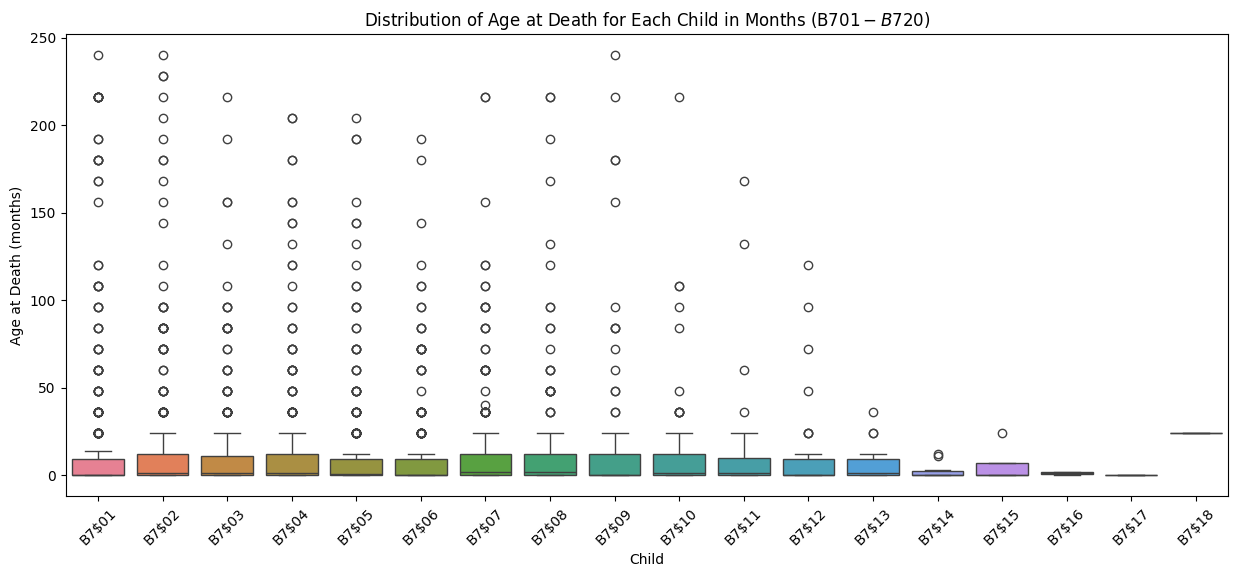

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------
# B7 Columns: Age at Death in Completed Months
# Variables B7$01 to B7$20 indicate age at death in months directly.
# Each column corresponds to a child ($01 = first child, $02 = second child, etc.)
# We will visualize the distribution across all children.
# --------------------------------------------------

# Find all B7 columns
b7_cols = [col for col in ever_married_df.columns if col.startswith("B7$")]

# Convert to numeric (in case of strings)
ever_married_df[b7_cols] = ever_married_df[b7_cols].apply(
    pd.to_numeric, errors="coerce"
)

# Create a temporary DataFrame for plotting
b7_months_df = ever_married_df[b7_cols].copy()

# Optional: filter out unrealistic values (e.g., > 240 months = 20 years)
b7_months_df = b7_months_df.apply(lambda col: col.where((col <= 240) & (col.notna())))
# --------------------------------------------------
# Combined Boxplot for All Children
# --------------------------------------------------
plt.figure(figsize=(15, 6))
sns.boxplot(data=b7_months_df)
plt.title("Distribution of Age at Death for Each Child in Months (B7$01 - B7$20)")
plt.xlabel("Child")
plt.ylabel("Age at Death (months)")
plt.xticks(rotation=45)
plt.show()

In [138]:
ever_married_df.columns  # List all columns in the DataFrame

Index(['id2', 'CASEID', 'B5$01', 'B5$02', 'B5$03', 'B5$04', 'B5$05', 'B5$06',
       'B5$07', 'B5$08', 'B5$09', 'B5$10', 'B5$11', 'B5$12', 'B5$13', 'B5$14',
       'B5$15', 'B5$16', 'B5$17', 'B5$18', 'B6$01', 'B6$02', 'B6$03', 'B6$04',
       'B6$05', 'B6$06', 'B6$07', 'B6$08', 'B6$09', 'B6$10', 'B6$11', 'B6$12',
       'B6$13', 'B6$14', 'B6$15', 'B6$16', 'B6$17', 'B6$18', 'B7$01', 'B7$02',
       'B7$03', 'B7$04', 'B7$05', 'B7$06', 'B7$07', 'B7$08', 'B7$09', 'B7$10',
       'B7$11', 'B7$12', 'B7$13', 'B7$14', 'B7$15', 'B7$16', 'B7$17', 'B7$18',
       'M17$01', 'M17$02', 'M17$03', 'M17$04', 'M17$05', 'M17$06', 'G102',
       'G102A', 'G103', 'G104', 'G105', 'G106', 'G107', 'V218'],
      dtype='object')

## Variable M17 :Delivery by caesarean

 M17 columns, the values are already categorical (1 = Yes, 2 = No), so we just need to:

Map them to "Yes" / "No" for clarity.

Count occurrences for each child.

Plot a bar chart showing the number of Caesarean vs Non-Caesarean deliveries for each child.

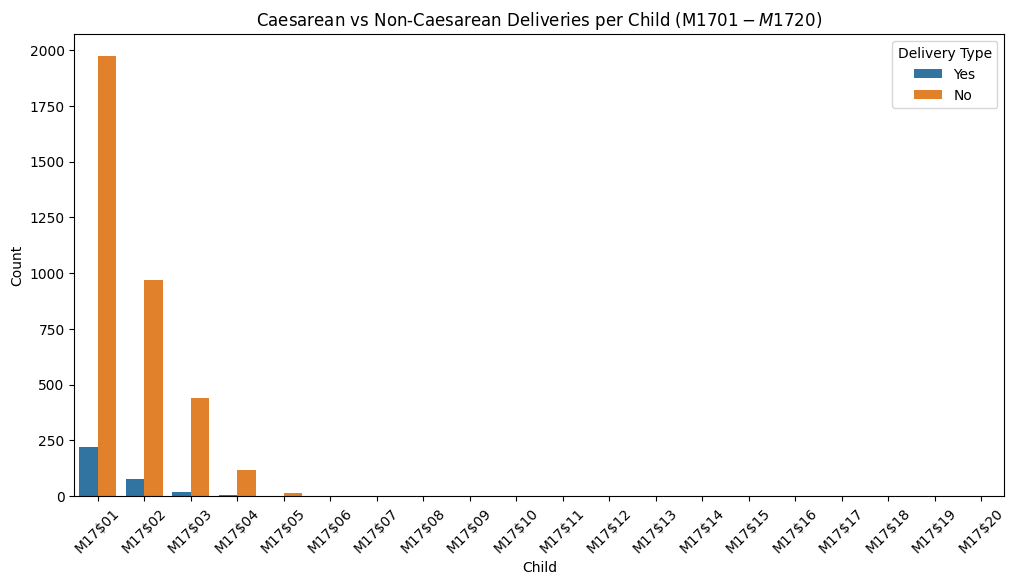

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------
# M17 Columns: Delivery by Caesarean Section
# 1 = Yes, 2 = No
# --------------------------------------------------

# 1. List the M17 columns manually based on your dataset
existing_m17_cols = [col for col in ever_married_df.columns if col.startswith("M17$")]

# 2. Convert to numeric
ever_married_df[existing_m17_cols] = ever_married_df[existing_m17_cols].apply(
    pd.to_numeric, errors="coerce"
)

# 3. Map numeric codes to readable categories and set datatype as category
ever_married_df[existing_m17_cols] = (
    ever_married_df[existing_m17_cols].replace({1: "Yes", 2: "No"}).astype("category")
)

# 4. Create temp df for counting
m17_temp = ever_married_df[existing_m17_cols]

# 5. Count Yes/No for each existing child
counts = []
for col in existing_m17_cols:
    yes_count = (m17_temp[col] == "Yes").sum()
    no_count = (m17_temp[col] == "No").sum()
    counts.append({"Child": col, "Yes": yes_count, "No": no_count})

m17_counts = pd.DataFrame(counts)

# 6. Add missing columns manually if you want to show $07-$20
all_m17_cols = [f"M17${str(i).zfill(2)}" for i in range(1, 20 + 1)]
for col in all_m17_cols:
    if col not in m17_counts["Child"].values:
        m17_counts = pd.concat(
            [m17_counts, pd.DataFrame({"Child": [col], "Yes": [0], "No": [0]})],
            ignore_index=True,
        )

# 7. Melt for seaborn
m17_melted = m17_counts.melt(
    id_vars="Child", value_vars=["Yes", "No"], var_name="Delivery", value_name="Count"
)

# 8. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=m17_melted,
    x="Child",
    y="Count",
    hue="Delivery",
    order=all_m17_cols,  # force $01-$20 order
)
plt.title("Caesarean vs Non-Caesarean Deliveries per Child (M17$01 - M17$20)")
plt.xlabel("Child")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Delivery Type")
plt.show()

### G102 — If Respondent Circumcised

This variable indicates whether the respondent has been circumcised:

- 1 = Yes
- 2 = No

We convert the numeric codes directly to readable categories (`Yes`/`No`) in the DataFrame and plot the distribution of responses.

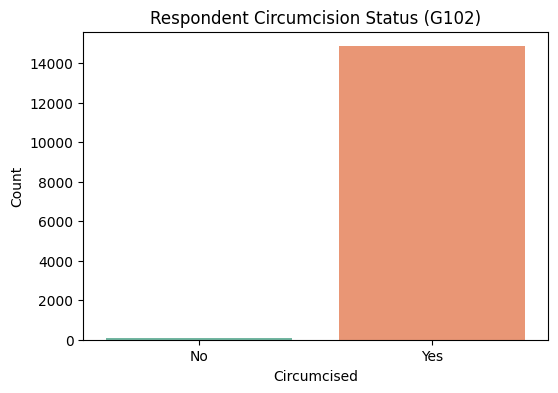

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numeric (in case they are strings)
ever_married_df["G102"] = pd.to_numeric(ever_married_df["G102"], errors="coerce")

# Map numeric values directly in the dataframe and set as category
ever_married_df["G102"] = (
    ever_married_df["G102"].replace({1: "Yes", 2: "No"}).astype("category")
)

# Count Yes/No
g102_counts = ever_married_df["G102"].value_counts().reset_index()
g102_counts.columns = ["Circumcised", "Count"]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=g102_counts,
    x="Circumcised",
    y="Count",
    hue="Circumcised",
    palette="Set2",
    legend=False,
)
plt.title("Respondent Circumcision Status (G102)")
plt.xlabel("Circumcised")
plt.ylabel("Count")
plt.show()

### G102A — Type of Circumcision Respondent Underwent

This variable indicates the type of circumcision performed:

- 1: Sunn
- 2: Intermediate
- 3: Pharaonic
- 4: Don't Know
- 5: Other

We map these numeric codes directly to readable labels in the DataFrame and plot the distribution of each type.

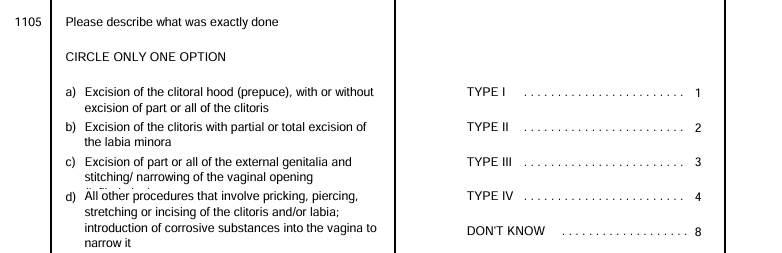

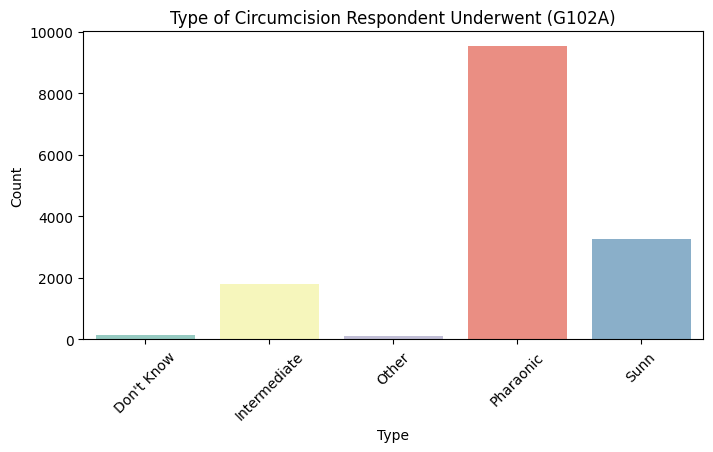

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numeric (in case there are strings)
ever_married_df["G102A"] = pd.to_numeric(ever_married_df["G102A"], errors="coerce")

# Map numeric codes directly in the dataframe and set as category
ever_married_df["G102A"] = (
    ever_married_df["G102A"]
    .replace(
        {1: "Sunn", 2: "Intermediate", 3: "Pharaonic", 4: "Don't Know", 8: "Other"}
    )
    .astype("category")
)

# Count each type
g102a_counts = ever_married_df["G102A"].value_counts().reset_index()
g102a_counts.columns = ["Type", "Count"]

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=g102a_counts, x="Type", y="Count", hue="Type", palette="Set3", legend=False
)
plt.title("Type of Circumcision Respondent Underwent (G102A)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### G103 – G105: Circumcision Procedure Details

These variables indicate specific procedures performed during circumcision:

- **G103**: Flesh removed from genital area (1 = Yes, missing/other = No)  
- **G104**: Genital area just nicked without removing any flesh (1 = Yes, missing/other = No)  
- **G105**: Genital area sewn closed (1 = Yes, missing/other = No)  

We convert numeric values to categorical labels (`Yes`/`No`) directly in the DataFrame and plot the distributions.


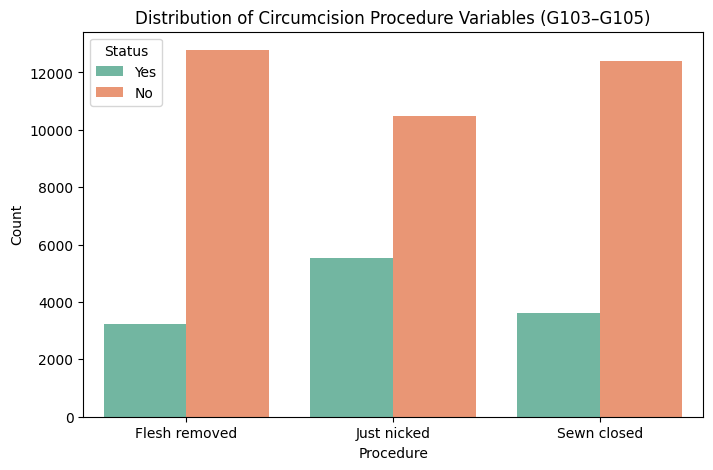

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of procedure variables
g_vars = ["G103", "G104", "G105"]

# Convert to numeric
ever_married_df[g_vars] = ever_married_df[g_vars].apply(pd.to_numeric, errors="coerce")

# Map numeric values to Yes/No and convert to category
for col in g_vars:
    ever_married_df[col] = (
        ever_married_df[col]
        .apply(lambda x: "Yes" if x == 1 else "No")
        .astype("category")
    )

# Count values for each variable
counts_dict = {col: ever_married_df[col].value_counts() for col in g_vars}
counts_df = (
    pd.DataFrame(counts_dict)
    .T.fillna(0)
    .reset_index()
    .rename(columns={"index": "Variable"})
)

# Melt dataframe for Seaborn
counts_melted = counts_df.melt(
    id_vars="Variable", value_vars=["Yes", "No"], var_name="Status", value_name="Count"
)

# Descriptive labels only for the plot
labels_for_plot = {
    "G103": "Flesh removed",
    "G104": "Just nicked",
    "G105": "Sewn closed",
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=counts_melted, x="Variable", y="Count", hue="Status", palette="Set2")
plt.title("Distribution of Circumcision Procedure Variables (G103–G105)")
plt.xlabel("Procedure")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=[labels_for_plot[x] for x in g_vars])
plt.legend(title="Status")
plt.show()

### G106 - Age at Circumcision
- Values represent age in **years**, with special codes:
  - 95 = baby
  - 98 = Don't Know

### G107 - Who Performed Circumcision
- Codes indicate the type of circumciser:
  - 11: Traditional circumcizer
  - 12: Traditional birth attendant
  - 13: Other traditional
  - 21: Doctor
  - 22: Clinical officer
  - 23: Nurse/midwife
  - 24: Other health professional
  - 26: Don't know

### V218 - Number of Living Children
- Numeric variable representing how many children the respondent has alive.


C:\Users\isikm\AppData\Local\Temp\ipykernel_32472\2384108083.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=g106_counts, x='Age Category', y='Count', palette='Set2')


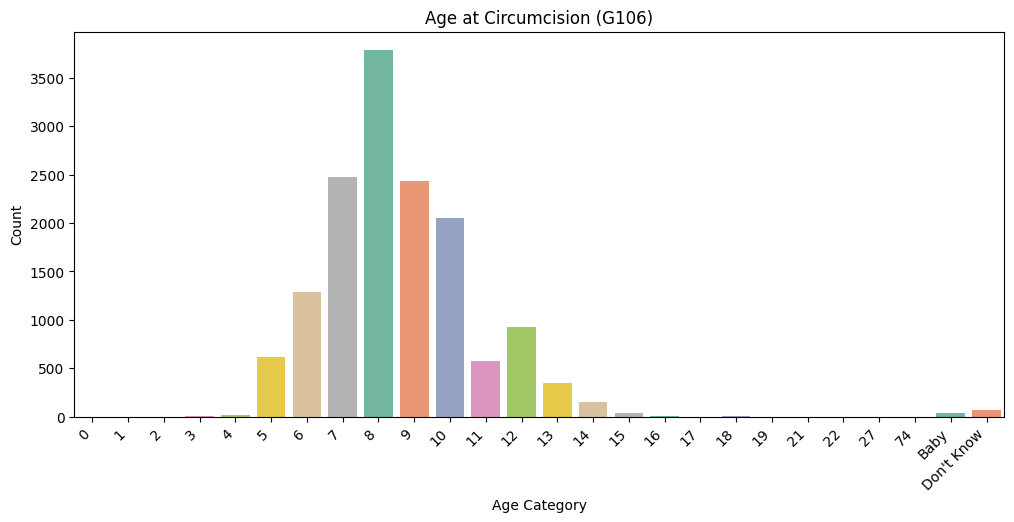

G106 Percentages:
 G106
0              0.01
1              0.01
2              0.01
3              0.05
4              0.14
5              4.15
6              8.70
7             16.64
8             25.49
9             16.41
10            13.78
11             3.90
12             6.20
13             2.34
14             1.05
15             0.28
16             0.07
17             0.01
18             0.02
19             0.01
21             0.01
22             0.01
27             0.01
74             0.01
Baby           0.24
Don't Know     0.46
Name: proportion, dtype: float64

G107 Counts:
                      Performer  Count
0      Traditional circumcizer  10686
1  Traditional birth attendant   3125
2             Clinical officer    348
3                       Doctor    229
4                Nurse/midwife    226
5           Other professional    122
6                   Don't know     67
7            Other traditional     50
G107 Percentages:
 G107
Traditional circumcizer        71.95
Tradi

C:\Users\isikm\AppData\Local\Temp\ipykernel_32472\2384108083.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=g107_counts, x='Performer', y='Count', palette='Set3')


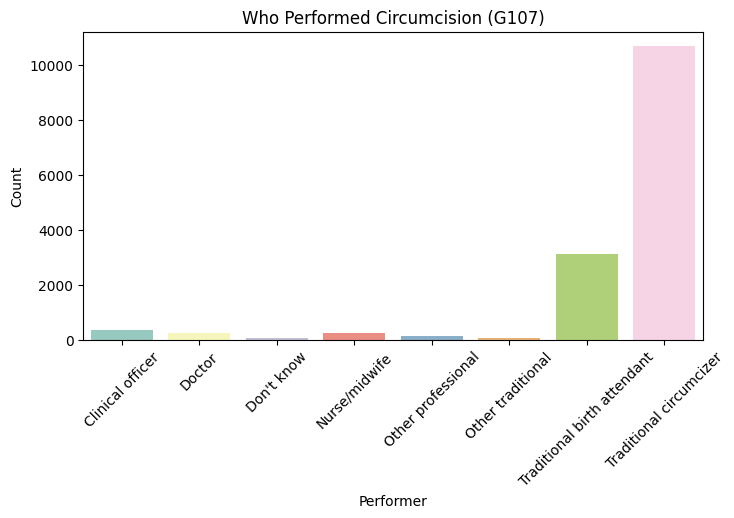


V218 Counts:
    Number of Living Children  Count
0                        0.0      9
1                        1.0     40
2                        2.0    143
3                        3.0    231
4                        4.0    278
5                        5.0    330
6                        6.0    334
7                        7.0    322
8                        8.0    256
9                        9.0    178
V218 Percentages:
 V218
6.0    15.75
5.0    15.56
7.0    15.18
4.0    13.11
8.0    12.07
3.0    10.89
9.0     8.39
2.0     6.74
1.0     1.89
0.0     0.42
Name: proportion, dtype: float64


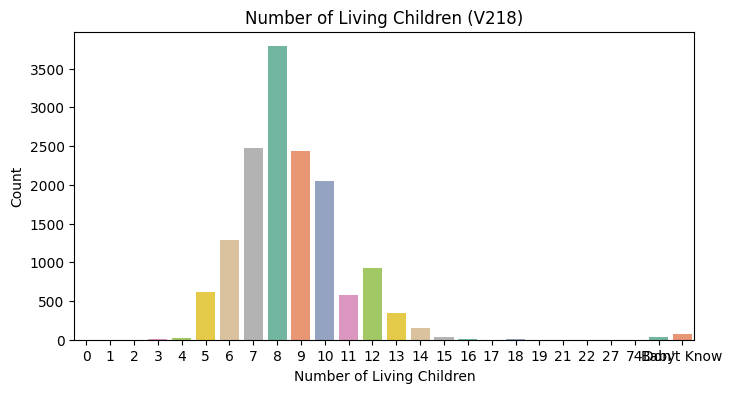

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# G106 - Age at Circumcision
# ------------------------------


# Map numeric ages and special codes directly in the same column
def map_age(x):
    if pd.isna(x):
        return None
    elif x == 95:
        return "Baby"
    elif x == 98:
        return "Don't Know"
    else:
        return str(int(x))  # convert numeric ages to string


ever_married_df["G106"] = ever_married_df["G106"].apply(map_age)

# Create ordered categories
unique_values = [x for x in ever_married_df["G106"].dropna().unique()]
numeric_ages = sorted(
    [x for x in unique_values if x not in ["Baby", "Don't Know"]], key=int
)
all_categories = numeric_ages + ["Baby", "Don't Know"]

ever_married_df["G106"] = pd.Categorical(
    ever_married_df["G106"], categories=all_categories, ordered=True
)

# Count and prepare for plotting
g106_counts = (
    ever_married_df["G106"]
    .value_counts()
    .reindex(all_categories)
    .fillna(0)
    .reset_index()
)
g106_counts.columns = ["Age Category", "Count"]

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=g106_counts, x="Age Category", y="Count", palette="Set2")
plt.title("Age at Circumcision (G106)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# Percentages
percentages = (
    ever_married_df["G106"]
    .value_counts(normalize=True)
    .reindex(all_categories)
    .mul(100)
    .round(2)
)
print("G106 Percentages:\n", percentages)


# ------------------------------
# G107 - Who Performed Circumcision
# ------------------------------
# Convert to numeric
ever_married_df["G107"] = pd.to_numeric(ever_married_df["G107"], errors="coerce")

# Map numeric codes to readable categories and convert to category
ever_married_df["G107"] = (
    ever_married_df["G107"]
    .replace(
        {
            11: "Traditional circumcizer",
            12: "Traditional birth attendant",
            13: "Other traditional",
            16: "Other traditional",
            21: "Doctor",
            22: "Clinical officer",
            23: "Nurse/midwife",
            24: "Other professional",
            26: "Other professional",
            98: "Don't know",
        }
    )
    .astype("category")
)

# Count and percentage
g107_counts = ever_married_df["G107"].value_counts().reset_index()
g107_counts.columns = ["Performer", "Count"]

print("\nG107 Counts:\n", g107_counts)
print(
    "G107 Percentages:\n",
    ever_married_df["G107"].value_counts(normalize=True).mul(100).round(2),
)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=g107_counts, x="Performer", y="Count", palette="Set3")
plt.title("Who Performed Circumcision (G107)")
plt.xlabel("Performer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# ------------------------------
# V218 - Number of Living Children
# ------------------------------
# Convert to numeric
ever_married_df["V218"] = pd.to_numeric(ever_married_df["V218"], errors="coerce")

# Count and percentage
v218_counts = ever_married_df["V218"].value_counts().sort_index().reset_index()
v218_counts.columns = ["Number of Living Children", "Count"]

print("\nV218 Counts:\n", v218_counts)
print(
    "V218 Percentages:\n",
    ever_married_df["V218"].value_counts(normalize=True).mul(100).round(2),
)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=g106_counts,
    x="Age Category",
    y="Count",
    hue="Age Category",
    palette="Set2",
    legend=False,
)
plt.title("Number of Living Children (V218)")
plt.xlabel("Number of Living Children")
plt.ylabel("Count")
plt.show()

     id2  CASEID  B5$01  B5$02  ...  G105  G106                     G107  V218
0  256.0   216.0    NaN    NaN  ...    No     9  Traditional circumcizer   NaN
1  245.0   403.0    NaN    NaN  ...    No     6  Traditional circumcizer   NaN
2  257.0   502.0    2.0    1.0  ...   Yes     6  Traditional circumcizer   NaN
3  258.0   645.0    NaN    NaN  ...    No     8  Traditional circumcizer   NaN
4  259.0   705.0    NaN    NaN  ...    No    11  Traditional circumcizer   NaN

[5 rows x 70 columns]
Index(['id2', 'CASEID', 'B5$01', 'B5$02', 'B5$03', 'B5$04', 'B5$05', 'B5$06',
       'B5$07', 'B5$08', 'B5$09', 'B5$10', 'B5$11', 'B5$12', 'B5$13', 'B5$14',
       'B5$15', 'B5$16', 'B5$17', 'B5$18', 'B6$01', 'B6$02', 'B6$03', 'B6$04',
       'B6$05', 'B6$06', 'B6$07', 'B6$08', 'B6$09', 'B6$10', 'B6$11', 'B6$12',
       'B6$13', 'B6$14', 'B6$15', 'B6$16', 'B6$17', 'B6$18', 'B7$01', 'B7$02',
       'B7$03', 'B7$04', 'B7$05', 'B7$06', 'B7$07', 'B7$08', 'B7$09', 'B7$10',
       'B7$11', 'B7$12', 'B7$1

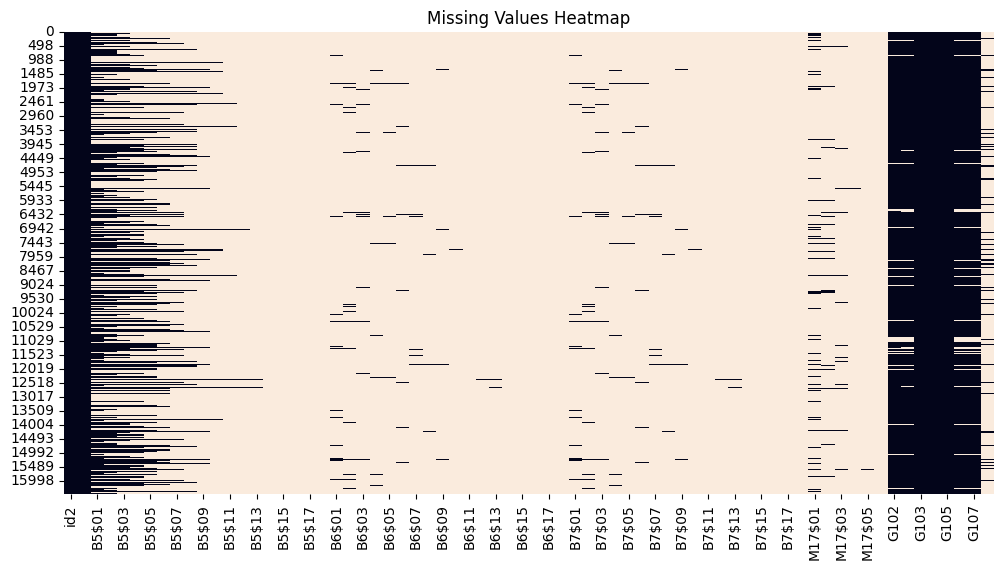

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(ever_married_df.head())
print(ever_married_df.columns)
print(ever_married_df.shape)


plt.figure(figsize=(12, 6))
sns.heatmap(ever_married_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()